In [1]:
from lifelines.datasets import load_rossi

rossi = load_rossi()

In [12]:
print(rossi)

     week  arrest  fin  age  race  wexp  mar  paro  prio
0      20       1    0   27     1     0    0     1     3
1      17       1    0   18     1     0    0     1     8
2      25       1    0   19     0     1    0     1    13
3      52       0    1   23     1     1    1     1     1
4      52       0    0   19     0     1    0     1     3
..    ...     ...  ...  ...   ...   ...  ...   ...   ...
427    52       0    1   31     0     1    0     1     3
428    52       0    0   20     1     0    0     1     1
429    52       0    1   20     1     1    1     1     1
430    52       0    0   29     1     1    0     1     3
431    52       0    1   24     1     1    0     1     1

[432 rows x 9 columns]


In [4]:
from lifelines import CoxPHFitter
from lifelines.datasets import load_rossi

rossi = load_rossi()

cph = CoxPHFitter()
cph.fit(rossi, duration_col='week', event_col='arrest')

cph.print_summary()  # access the individual results using cph.summary

<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>
             duration col = 'week'
                event col = 'arrest'
      baseline estimation = breslow
   number of observations = 432
number of events observed = 114
   partial log-likelihood = -658.75
         time fit was run = 2023-03-20 07:31:59 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
fin        -0.38       0.68       0.19            -0.75            -0.00                 0.47                 1.00
age        -0.06       0.94       0.02            -0.10            -0.01                 0.90                 0.99
race        0.31       1.37       0.31            -0.29             0.92                 0.75                 2.50
wexp       -0.15       0.86       0.21            -0.57             0.27                 0.57                 1.30
mar        -0.43       0.65       0.38            -1.18             0.31                 0.31                 1.37
paro       -0.08       0.92       0.20            -0.47             0.30                 0.63                 1.35
prio        0.09       1.10       0.03             0.04             0.15                 1.04                 1.16

            cmp to     z      p   -log2(p)
covariate                                 
fin           0.00 -1.98   0.05       4.40
age           0.00 -2.61   0.01       6.79
race          0.00  1.02   0.31       1.70
wexp          0.00 -0.71   0.48       1.06
mar           0.00 -1.14   0.26       1.97
paro          0.00 -0.43   0.66       0.59
prio          0.00  3.19 <0.005       9.48
---
Concordance = 0.64
Partial AIC = 1331.50
log-likelihood ratio test = 33.27 on 7 df
-log2(p) of ll-ratio test = 15.37

In [5]:
cph.fit(rossi, duration_col='week', event_col='arrest', formula="fin + wexp + age * prio")

<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>

In [6]:
cph.fit(rossi, duration_col='week', event_col='arrest', formula="fin + wexp + age * prio")
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>
             duration col = 'week'
                event col = 'arrest'
      baseline estimation = breslow
   number of observations = 432
number of events observed = 114
   partial log-likelihood = -659.39
         time fit was run = 2023-03-20 07:32:08 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
age        -0.03       0.97       0.03            -0.09             0.03                 0.92                 1.03
fin        -0.33       0.72       0.19            -0.70             0.04                 0.49                 1.05
prio        0.31       1.36       0.17            -0.03             0.64                 0.97                 1.90
wexp       -0.24       0.79       0.21            -0.65             0.17                 0.52                 1.19
age:prio   -0.01       0.99       0.01            -0.02             0.01                 0.98                 1.01

            cmp to     z    p   -log2(p)
covariate                               
age           0.00 -0.93 0.35       1.51
fin           0.00 -1.73 0.08       3.57
prio          0.00  1.80 0.07       3.80
wexp          0.00 -1.14 0.26       1.97
age:prio      0.00 -1.28 0.20       2.32
---
Concordance = 0.64
Partial AIC = 1328.77
log-likelihood ratio test = 31.99 on 5 df
-log2(p) of ll-ratio test = 17.35

<Axes: >

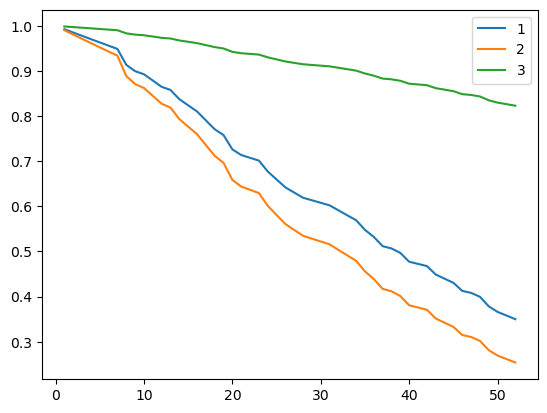

In [37]:
X = rossi.loc[1:3,'fin':'prio']

cph.predict_survival_function(X).plot()

<Axes: >

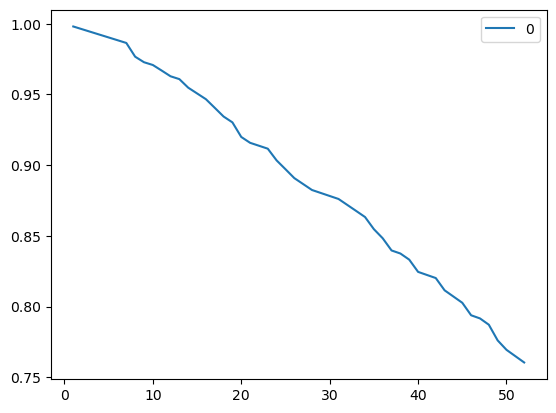

In [39]:
X = rossi.loc[:,'fin':'prio'].mean()

cph.predict_survival_function(X).plot()

In [8]:
cph.predict_median(X)

0       inf
1      39.0
2      33.0
3       inf
4       inf
       ... 
427     inf
428     inf
429     inf
430     inf
431     inf
Name: 0.5, Length: 432, dtype: float64

In [8]:
cph.predict_partial_hazard(X)

0      1.157686
1      3.768718
2      4.919517
3      0.699116
4      1.447786
         ...   
427    0.520233
428    1.385036
429    0.784224
430    0.812407
431    0.672850
Length: 432, dtype: float64

<Axes: >

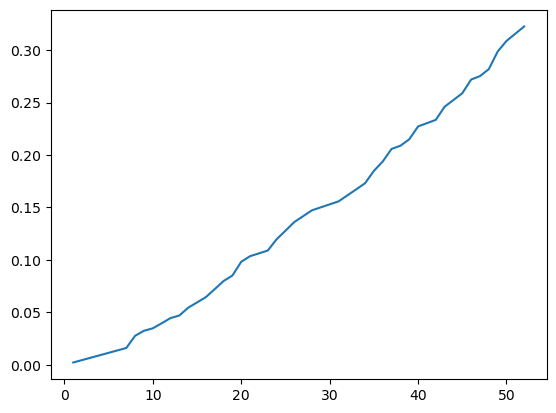

In [11]:
cph.predict_cumulative_hazard(X)

<Axes: xlabel='log(HR) (95% CI)'>

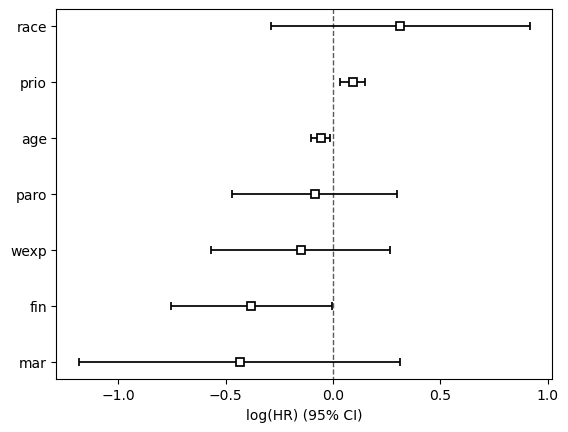

In [13]:
from lifelines.datasets import load_rossi
from lifelines import CoxPHFitter

rossi = load_rossi()
cph = CoxPHFitter()
cph.fit(rossi, duration_col='week', event_col='arrest')

cph.plot()

<Axes: >

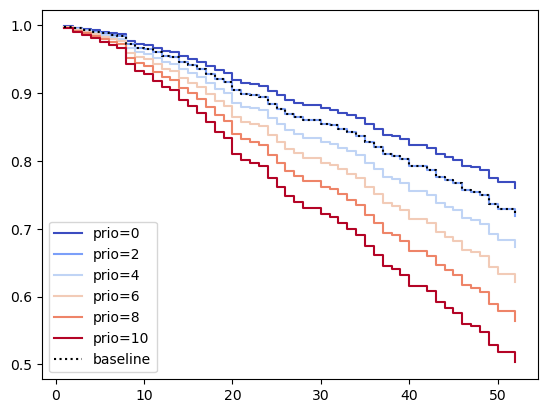

In [14]:
from lifelines.datasets import load_rossi
from lifelines import CoxPHFitter

rossi = load_rossi()
cph = CoxPHFitter()
cph.fit(rossi, duration_col='week', event_col='arrest')

cph.plot_partial_effects_on_outcome(covariates='prio', values=[0, 2, 4, 6, 8, 10], cmap='coolwarm')